<a href="https://colab.research.google.com/github/Liping-LZ/BDAI_2425/blob/main/Clustering/KMeans_clustering_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let's import data first
# Run the code and upload the csv file from your laptop
from google.colab import files
uploaded = files.upload()

Saving supermarket_data_short.csv to supermarket_data_short.csv


In [ ]:
import pandas as pd
# Read data
df = pd.read_csv('supermarket_data_short.csv')
df.head()

,Customer_ID,Age,Family_size,Income,Total_spent,Total_num_purchase
0,N1,58,1,58138,1617,22
1,N2,61,3,46344,27,4
2,N3,50,2,71613,776,20
3,N4,31,3,26646,53,6
4,N5,34,3,58293,422,14


In [ ]:
# this data has been cleaned. I processed the feature engineering before. If you want the original data, please contact me
# thus we will directly scale the data and build the model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = df.drop(['Customer_ID'], axis = 1)
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns)

In [ ]:
scaled_df.head()

,Age,Family_size,Income,Total_spent,Total_num_purchase
0,0.696429,0.00,0.351086,0.639683,0.6875
1,0.750000,0.50,0.277680,0.008730,0.1250
2,0.553571,0.25,0.434956,0.305952,0.6250
3,0.214286,0.50,0.155079,0.019048,0.1875
4,0.267857,0.50,0.352051,0.165476,0.4375


In [ ]:
"""
the KElbowVisualizer from yellowbrick is a tool to implements the “elbow” method to help data scientists
select the optimal number of clusters by fitting the model with a range of values for K (K is the number of clusters).
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
"""

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

"""
distortion: mean sum of squared distances to centers, i.e.the sum of the square distance between points in a cluster and the cluster centroid.
silhouette: mean ratio of intra-cluster and nearest-cluster distance. The value of the Silhouette score ranges from -1 to 1.
            silhouette_score = 1: Points are perfectly assigned in a cluster and clusters are easily distinguishable.
            silhouette_score = 0: Clusters are overlapping.
            silhouette_score = -1: Points are wrongly assigned in a cluster.
"""

'\ndistortion: mean sum of squared distances to centers, i.e.the sum of the square distance between points in a cluster and the cluster centroid.\nsilhouette: mean ratio of intra-cluster and nearest-cluster distance. The value of the Silhouette score ranges from -1 to 1.\n            silhouette_score = 1: Points are perfectly assigned in a cluster and clusters are easily distinguishable.\n            silhouette_score = 0: Clusters are overlapping.\n            silhouette_score = -1: Points are wrongly assigned in a cluster.\n'

Elbow Method to determine the number of clusters to be formed:


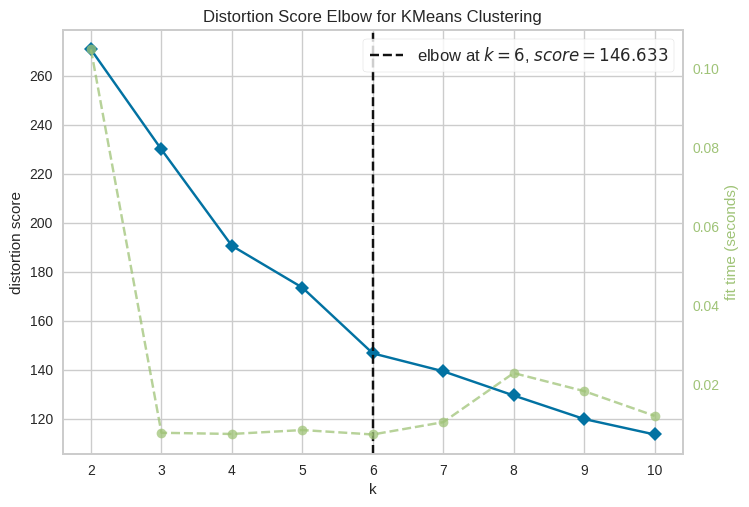

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
"""
If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication
that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.
"""
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(),k=(2,11))
Elbow_M.fit(scaled_df)
Elbow_M.show()

# from the below graph, we can see the optimal number of cluster is 6

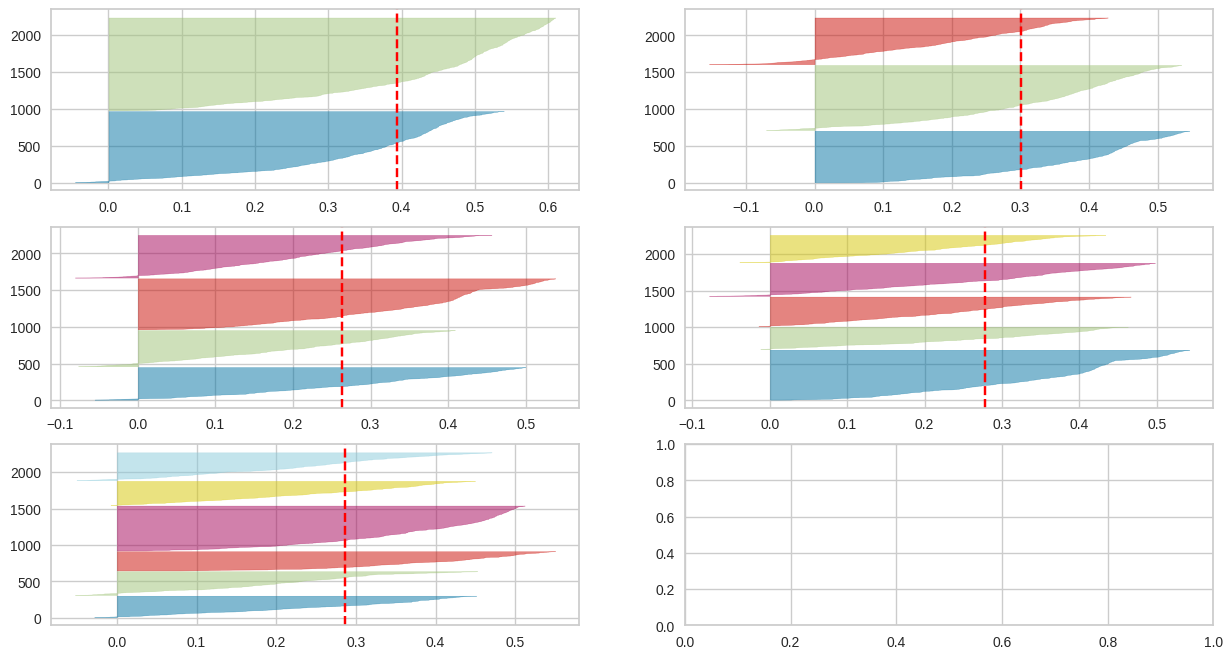

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df)


# from the below graph, we can see the optimal number is 2 or 3 or 6 as silhouette score higher the better. In this case, we will go for 3. If not working well, you could adjust the number and test.

In [ ]:
# once we got the k, we will start build the model and fit with the scaled data
kmeans_model = KMeans(n_clusters=3, random_state=3).fit(scaled_df)
df['Cluster'] = kmeans_model.predict(scaled_df) # here we add a column to show predicted cluster for each customer
df.head()

,Age,Family_size,Income,Total_spent,Total_num_purchase,Cluster
0,58,1,58138,1617,22,2
1,61,3,46344,27,4,0
2,50,2,71613,776,20,1
3,31,3,26646,53,6,0
4,34,3,58293,422,14,0


In [ ]:
# check the number of users allocated to each cluster
df['Cluster'].value_counts()

,count
Cluster,
0,1034
1,592
2,586


<ipython-input-15-ed157371c631>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Cluster"],palette= pal)
<ipython-input-15-ed157371c631>:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  pl = sns.countplot(x=df["Cluster"],palette= pal)


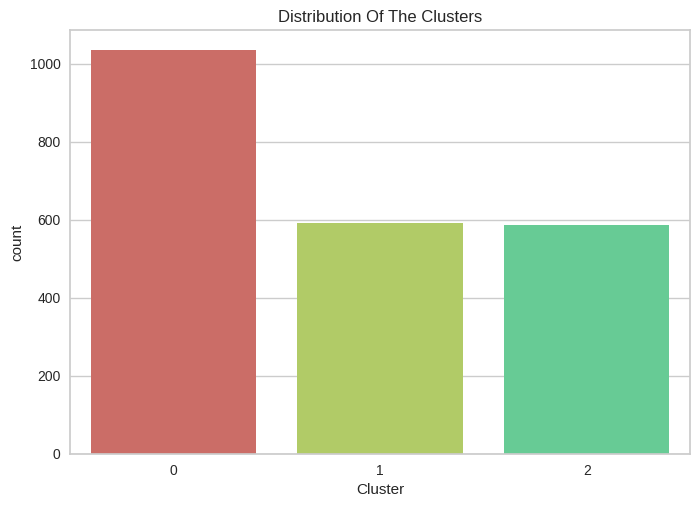

In [ ]:
import seaborn as sns

# visualise the number of users allocated to each cluster
pal = sns.color_palette("hls", 5)
pl = sns.countplot(x=df["Cluster"],palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
# return a table with mean of each feature for each cluster, so we can summarise the characteristics of each cluster
Clusters = df.groupby('Cluster', as_index=False).agg("mean")
Clusters

,Cluster,Age,Family_size,Income,Total_spent,Total_num_purchase
0,0,42.489362,2.904255,34760.179884,104.694391,6.014507
1,1,52.935811,2.863176,59386.160473,687.630068,16.594595
2,2,45.513652,1.771331,74802.484642,1412.877133,20.059727


<ipython-input-16-91101582d47a>:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  pl = sns.scatterplot(data = df,x=df["Total_spent"], y=df["Income"],hue=df["Cluster"],palette= pal)


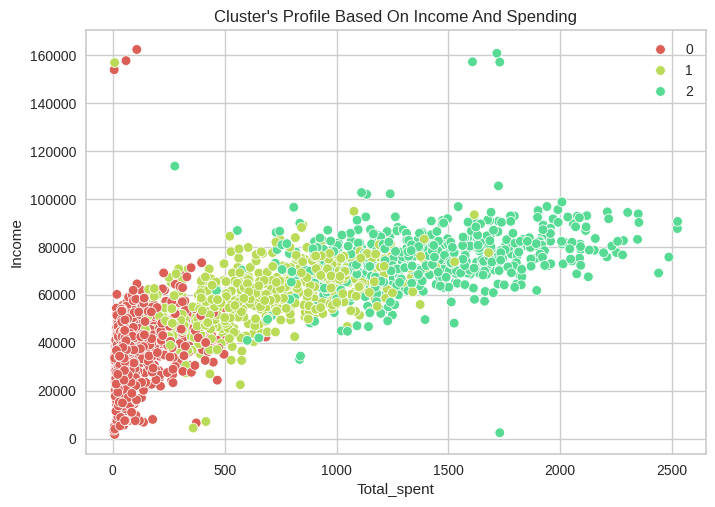

In [ ]:
# do some visualisation to better understand each cluster
# here we make a scatter plot to show total_spent and income distribution in each cluster

pl = sns.scatterplot(data = df,x=df["Total_spent"], y=df["Income"],hue=df["Cluster"],palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

<ipython-input-17-f67f871acfa3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=df["Cluster"], y=df["Total_spent"],palette= pal)
<ipython-input-17-f67f871acfa3>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  pl=sns.boxenplot(x=df["Cluster"], y=df["Total_spent"],palette= pal)


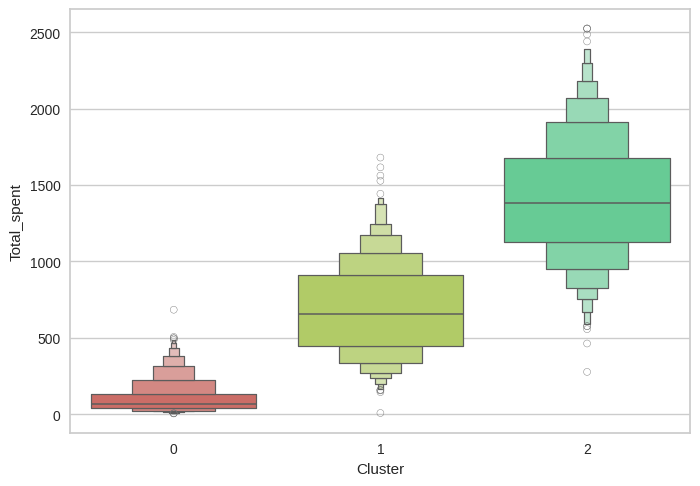

In [ ]:
# total_spent across 5 clusters
pl=sns.boxenplot(x=df["Cluster"], y=df["Total_spent"],palette= pal)
plt.show()

<ipython-input-18-7ed9b1210840>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=df["Cluster"], y=df["Total_num_purchase"],palette= pal)
<ipython-input-18-7ed9b1210840>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  pl=sns.boxenplot(x=df["Cluster"], y=df["Total_num_purchase"],palette= pal)


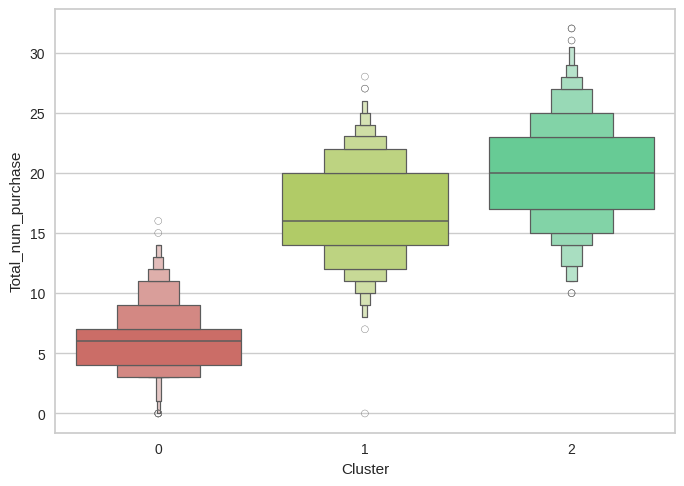

In [ ]:
# total_number_purchase across 5 clusters
pl=sns.boxenplot(x=df["Cluster"], y=df["Total_num_purchase"],palette= pal)
plt.show()

<ipython-input-19-2b4741a3707b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=df["Cluster"], y=df["Income"],palette= pal)
<ipython-input-19-2b4741a3707b>:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  pl=sns.boxenplot(x=df["Cluster"], y=df["Income"],palette= pal)


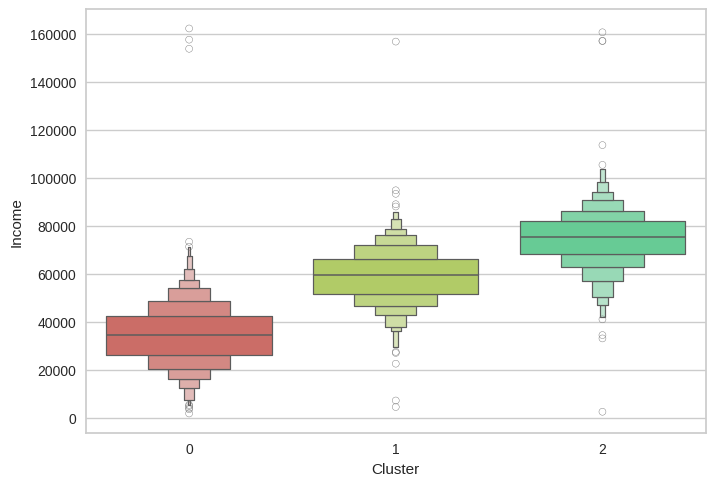

In [ ]:
# income accross 5 clusters
pl=sns.boxenplot(x=df["Cluster"], y=df["Income"],palette= pal)
plt.show()

<Axes: xlabel='Cluster'>

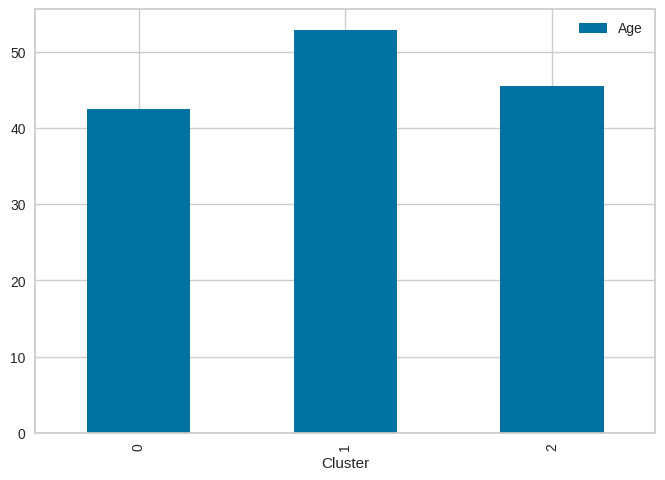

In [ ]:
# age
Clusters.plot(x="Cluster",y='Age',kind='bar')

<Axes: xlabel='Cluster'>

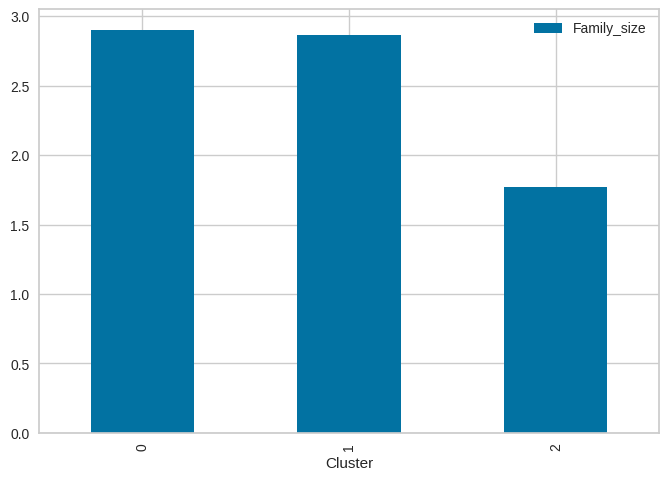

In [ ]:
# family status
Clusters.plot(x="Cluster",y='Family_size',kind='bar')